In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
df = pd.read_csv("Cars93.csv")

In [63]:
def handle_missing_values(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
    return df

def reduce_noise(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].reset_index(drop=True)
    return df

def encode_categorical_features(df):
    cat_cols = df.select_dtypes(include=['object']).columns
   
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(df[cat_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_cols))
    df = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True), encoded_df], axis=1)
    return df

def normalize_features(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

def create_data_splits(df, target='Price', train_size=0.7, val_size=0.2, test_size=0.1):
    df_train_val, df_test = train_test_split(df, test_size=test_size, random_state=42)
    relative_val_size = val_size / (train_size + val_size)
    df_train, df_val = train_test_split(df_train_val, test_size=relative_val_size, random_state=42)
    return df_train, df_val, df_test

try:
    df = pd.read_csv('Cars93.csv')
except FileNotFoundError:
    print("File 'Cars93.csv' not found. Please check the file path.")
    exit()

df = handle_missing_values(df)

df = reduce_noise(df)

df = encode_categorical_features(df)

df = normalize_features(df)

df_train, df_val, df_test = create_data_splits(df)

print(f"Train set shape: {df_train.shape}")
print(f"Validation set shape: {df_val.shape}")
print(f"Test set shape: {df_test.shape}")


Train set shape: (43, 116)
Validation set shape: (13, 116)
Test set shape: (7, 116)


In [64]:
# Solution to Q2a_Linear Regression


Sklearn Linear Regression Coefficient: 61.272186542110624
Sklearn Linear Regression Intercept: -39.06195591884392
Custom Linear Regression Coefficient: 61.272186542110624
Custom Linear Regression Intercept: -39.06195591884392


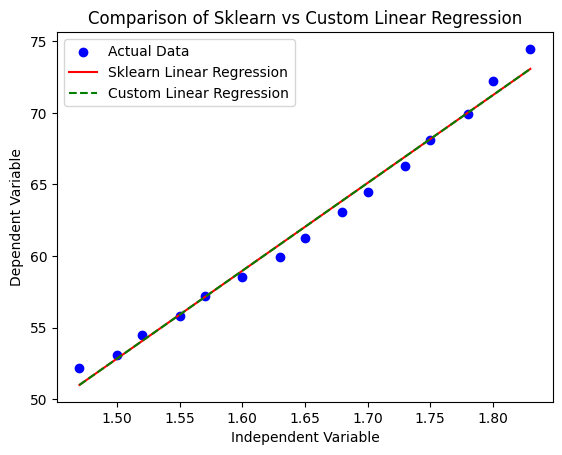

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

try:
    df = pd.read_csv("linear_regression_dataset.csv")
except FileNotFoundError:
    print("Error: File 'linear_regression_dataset.csv' not found. Please upload the file and try again.")
    exit()

X = df.iloc[:, 0].values.reshape(-1, 1)  # Independent variable
y = df.iloc[:, 1].values  # Dependent variable

model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)

print(f"Sklearn Linear Regression Coefficient: {model.coef_[0]}")
print(f"Sklearn Linear Regression Intercept: {model.intercept_}")

n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(y)
m = sum((X.flatten() - x_mean) * (y - y_mean)) / sum((X.flatten() - x_mean) ** 2)
c = y_mean - m * x_mean

y_pred_custom = m * X + c

print(f"Custom Linear Regression Coefficient: {m}")
print(f"Custom Linear Regression Intercept: {c}")

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_sklearn, color='red', label='Sklearn Linear Regression')
plt.plot(X, y_pred_custom, color='green', linestyle='dashed', label='Custom Linear Regression')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.legend()
plt.title("Comparison of Sklearn vs Custom Linear Regression")
plt.show()


In [66]:
# Solution to Q2b_Logistic Regression

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder

try:
    df = pd.read_csv("logistic_regression_dataset.csv")
except FileNotFoundError:
    print("Error: File 'logistic_regression_dataset.csv' not found. Please upload the file and try again.")
    exit()

X = df.iloc[:, :-1]  # Independent variables
y = df.iloc[:, -1]   # Dependent variable (target)

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[50  2]
 [ 7 21]]
Accuracy: 88.75%


### Q3: SVM - 15 marks  ###  

Use the dataset “Bank_Personal_Loan_Modelling.csv” 

In [68]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

1. Store the dataset in your google drive and in Colab file load the dataset from your drive.


In [69]:
Bank_Personal_Loan_Modelling_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

2. Check the shape and head of the dataset. 

In [70]:
print (Bank_Personal_Loan_Modelling_df.shape)
display(Bank_Personal_Loan_Modelling_df.head())

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


3. Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card 
is your Target Variable. 
    1. Take any 3 features from the six features given above
    2. Store features and targets into a separate variable

In [71]:
features = ["Age","Experience","CCAvg"]
target = ["CreditCard"] 
target_df = Bank_Personal_Loan_Modelling_df[target]

features_df = Bank_Personal_Loan_Modelling_df[features]

    3. Look for missing values in the data, if any, and address them accordingly.

In [72]:
# Bank_Personal_Loan_Modelling_df.isna().sum()
display(features_df.isna().sum())
display(target_df.isna().sum())

Age           0
Experience    0
CCAvg         0
dtype: int64

CreditCard    0
dtype: int64

No nulls in the features data and no nulls in the entire dataset as well 

    4. Plot a 3D scatter plot using Matplotlib. 

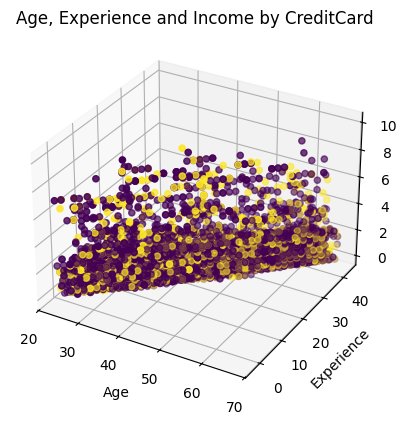

In [73]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter3D(
    xs=features_df[features[0]],
    ys=features_df[features[1]],
    zs=features_df[features[2]],
    c=target_df[target[0]])

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title(f'Age, Experience and Income by {target[0]}')

plt.show()

4. Split the dataset into 80:20. (3 features and 1 target variable). 

In [74]:
# scaling to make visualization and training easier
scaler = StandardScaler()
features_df = pd.DataFrame(scaler.fit_transform(features_df), columns=features,
                               index=features_df.index)

X_train, X_test, y_train, y_test = train_test_split(
    features_df, target_df,
    test_size=0.20, random_state=42,
    stratify=target_df,shuffle=True)

5. Train the model using scikit learn SVM API (LinearSVC) by setting the regularization 
parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}.  
 
    1. For each value of C Print the score on test data
    2. Make the prediction on test data
    3. Print confusion matrix and classification report 

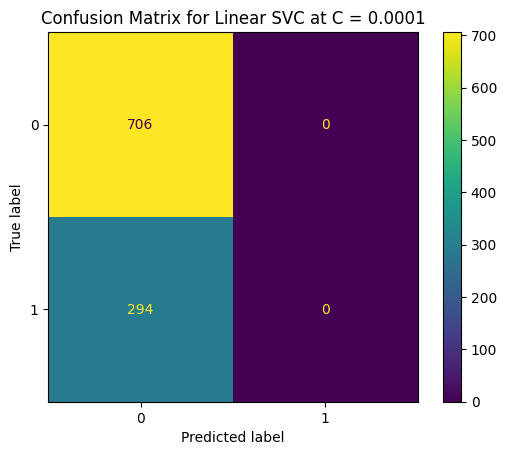

C_value:	0.0001
Accuracy:	0.71 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000







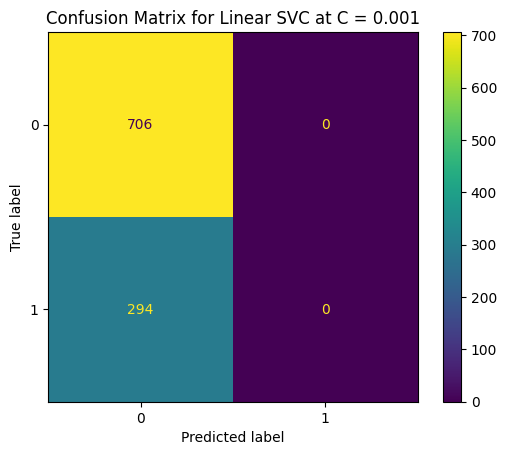

C_value:	0.001
Accuracy:	0.71 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000







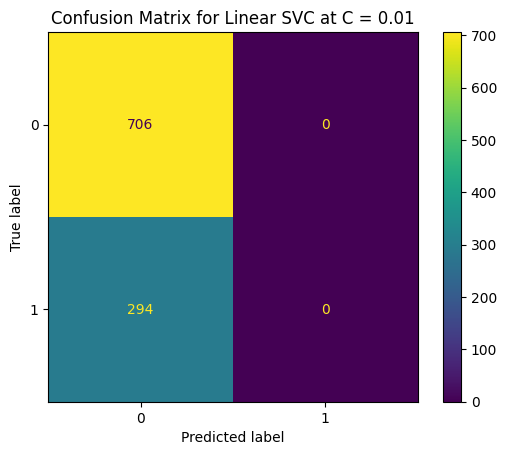

C_value:	0.01
Accuracy:	0.71 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000







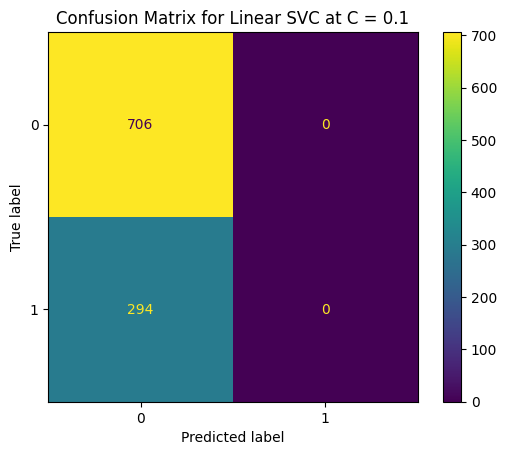

C_value:	0.1
Accuracy:	0.71 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000







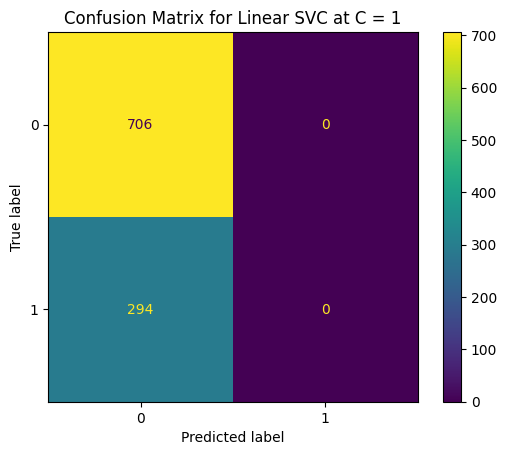

C_value:	1
Accuracy:	0.71 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000







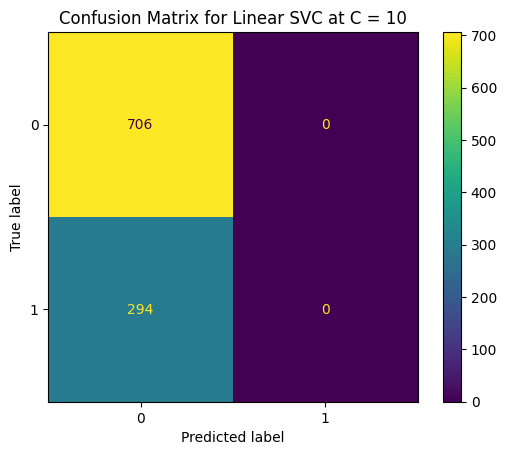

C_value:	10
Accuracy:	0.71 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000







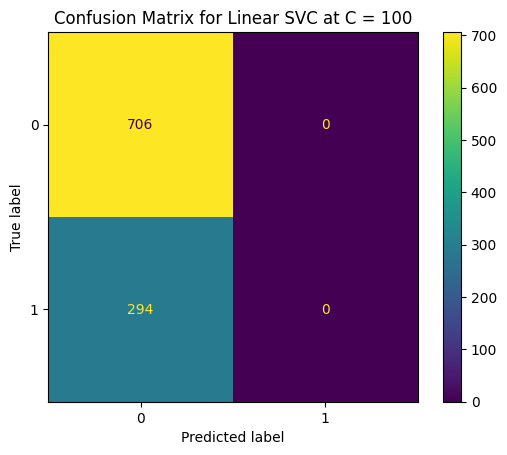

C_value:	100
Accuracy:	0.71 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000







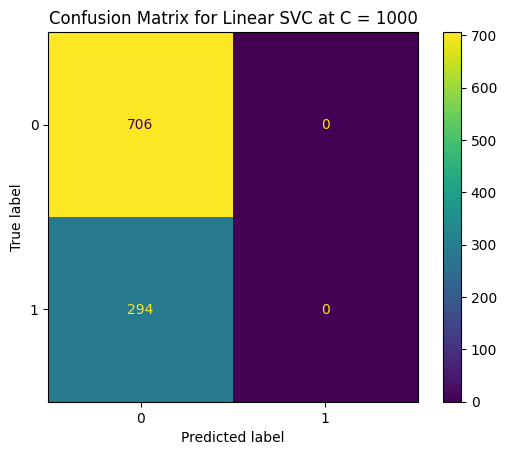

C_value:	1000
Accuracy:	0.71 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000







In [75]:
possibili_Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in possibili_Cs:
    LinearSVC_clf = LinearSVC(C=C_value,random_state=42)
    LinearSVC_clf.fit(X_train, y_train)
    y_pred = LinearSVC_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix for Linear SVC at C = {C_value}")
    plt.show()
    
    report = classification_report(y_test, y_pred)
    print(f"C_value:\t{C_value}\nAccuracy:\t{accuracy_score(y_test, y_pred):.2f}","\n",report)
    
    # break
    print("\n"*3)

6. Use gridSearchCV a cross-validation technique to find the best regularization
parameters  
(i.e.: the best value of C).


In [76]:
param_grid = {
    'C': possibili_Cs,
    "random_state":[42]
}

In [77]:
grid_search = GridSearchCV(
    estimator= LinearSVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train, y_train)

/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'random_state': [42]},
             scoring='accuracy')

In [78]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_params = {**grid_search.best_params_}


Best parameters: {'C': 0.0001, 'random_state': 42}
Best cross-validation score: 0.7060000000000001


In [79]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid',]
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc

In [80]:
for kernel in kernels:
    clf =SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
    precision, recall, _ = precision_recall_curve(y_train, clf.predict(X_train))
    train_pr_auc = auc(recall, precision)

    precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))
    test_pr_auc = auc(recall, precision)



    print(f'{kernel}:\t{train_pr_auc} \t{test_pr_auc}')



linear:	0.647 	0.647
poly:	0.647 	0.647
rbf:	0.647 	0.647
sigmoid:	0.4058464109781844 	0.3634128785088042


In the report provide your findings for the output generated for all the kernels used and also
describe the changes that happened after changing the regularization hyperparameter.


Kernels used:
    1. Linear , Polynomial and RBF kernels : AUPRC of 64.7
    2. Sigmoid kernel: AUPRC of .37 ~ .39

As expected the sigmoid kernel did not give a great results as none of the input variables are which that can be divided into 0 and 1

Changing the regularization hyperparameter seems to have near to no effect on the classification model though.

#### Q4: Decision Tree and Random Forest – 15 Marks #####

In [81]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, accuracy_score
# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


from hyperopt import fmin, tpe, hp, STATUS_OK, Trials,space_eval
from pprint import pprint



Load the IRIS dataset. The dataset consists of 150 samples of iris flowers, each belonging to
one of three species (setosa, versicolor, or virginica). Each sample includes four features: sepal
length, sepal width, petal length, and petal width.

In [82]:
from sklearn.datasets import load_iris

iris = load_iris()

feature_names = iris.feature_names

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target

target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

iris_df['species'] = iris_df['target'].map(target_names)

display(iris_df.head(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


1. Visualize the distribution of each feature and the class distribution.

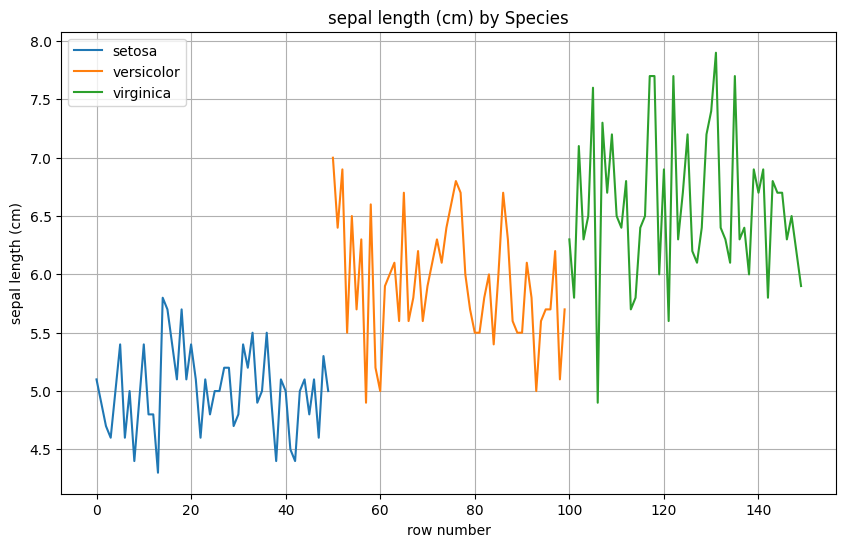

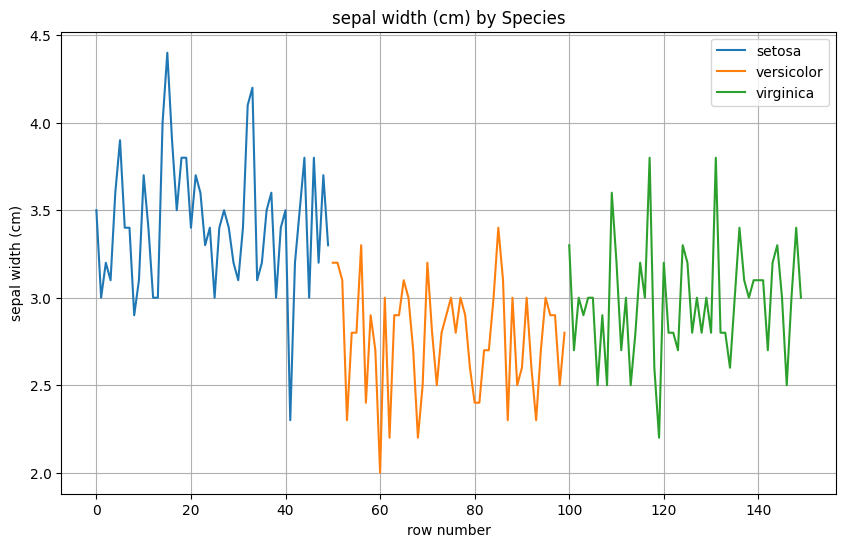

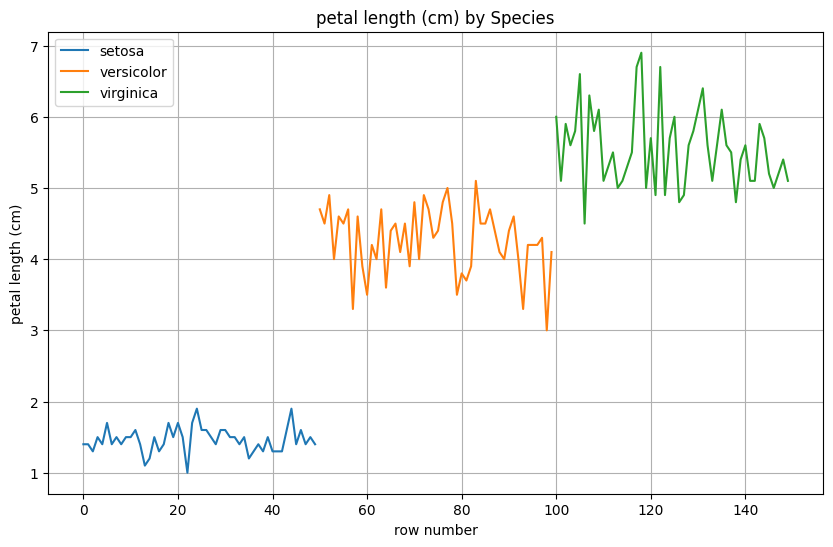

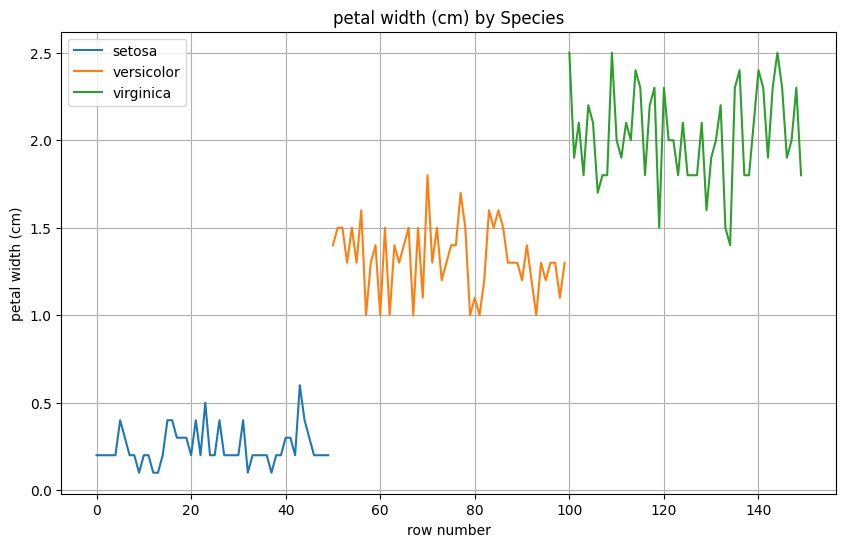

In [83]:
for feature in feature_names:
    plt.figure(figsize=(10, 6))
    for species in iris.target_names:
        species_data = iris_df[iris_df['species'] == species]
        plt.plot(species_data.index,
                species_data[feature],
                label=species)

    plt.xlabel('row number')
    plt.ylabel(feature)
    plt.title(f'{feature} by Species')
    plt.legend()
    plt.grid(True)
    plt.show()

2. Encode the categorical target variable (species) into numerical values.  

In [84]:
from sklearn.preprocessing import LabelEncoder

iris_df.drop(columns=["target"],inplace=True)

iris_df["Label_Encoded"] = LabelEncoder().fit_transform(iris_df["species"])
display(iris_df.head().T)

,0,1,2,3,4
sepal length (cm),5.1,4.9,4.7,4.6,5.0
sepal width (cm),3.5,3.0,3.2,3.1,3.6
petal length (cm),1.4,1.4,1.3,1.5,1.4
petal width (cm),0.2,0.2,0.2,0.2,0.2
species,setosa,setosa,setosa,setosa,setosa
Label_Encoded,0,0,0,0,0


3. Split the dataset into training and testing sets (use an appropriate ratio).  

In [85]:
target_df = iris_df["Label_Encoded"]
features_df = iris_df[feature_names]

scaler = StandardScaler()
features_df = pd.DataFrame(scaler.fit_transform(features_df), columns=feature_names,
                               index=features_df.index)


X_train, X_test, y_train, y_test = train_test_split(
    features_df, target_df,
    test_size=0.20, random_state=42,
    stratify=target_df,shuffle=True)

print(y_train.value_counts())
print(y_test.value_counts())

Label_Encoded
0    40
2    40
1    40
Name: count, dtype: int64
Label_Encoded
0    10
2    10
1    10
Name: count, dtype: int64


4. Decision Tree Model 
    1. Build a decision tree classifier using the training set. 
    2. Visualize the resulting decision tree. 
    3. Make predictions on the testing set and evaluate the model's performance using appropriate metrics (e.g., accuracy, confusion matrix).  

In [86]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

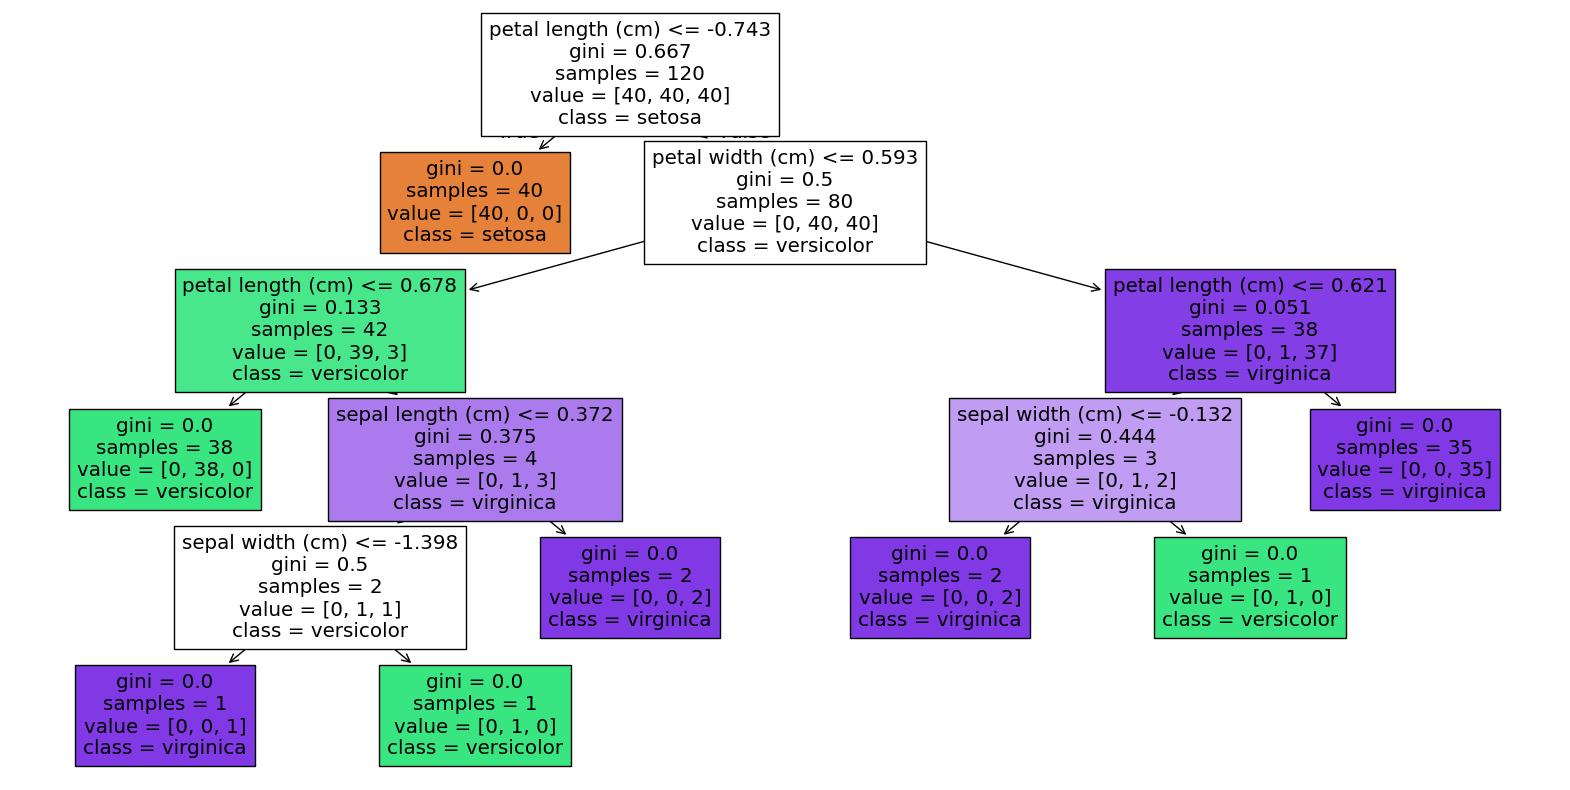

In [87]:
# %%script false --no-raise-error

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_names, class_names=iris.target_names, filled=True)
plt.show()


Accuracy: 0.93


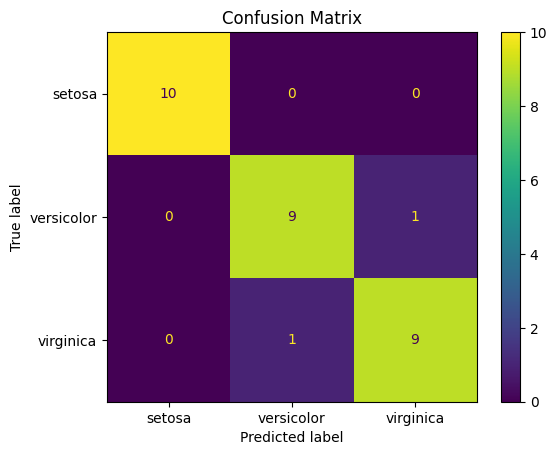


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [88]:
# %%script false --no-raise-error

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


5. Random Forest Model 

    1. Build a random forest classifier using the training set.
    2. Tune the hyperparameters (e.g., number of trees, maximum depth) if necessary. 
    3. Make predictions on the testing set and evaluate the model's performance using 
appropriate metrics and compare it with the decision tree model. 


In [89]:
RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [90]:
def objective(params):
    clf = RandomForestClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

In [91]:
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', range(1, 10)),
    'criterion': hp.choice("criterion",["gini", "entropy", "log_loss"]),
    'random_state': hp.choice("random_state",[42])
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)
best_params = space_eval(space=space,hp_assignment=best)
print("Best parameters: ")
pprint(best_params)

100%|██████████| 100/100 [00:53<00:00,  1.87trial/s, best loss: -0.9666666666666668]
Best parameters: 
{'criterion': 'log_loss',
 'max_depth': 19,
 'max_features': 2,
 'min_samples_leaf': 9,
 'min_samples_split': 0.32719823631791123,
 'n_estimators': 22,
 'random_state': 42}


Accuracy: 0.93


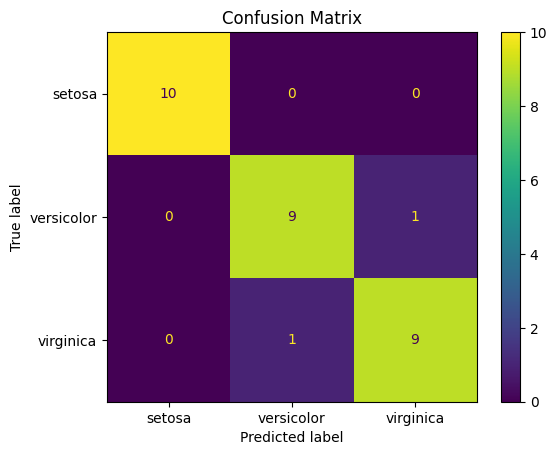


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [92]:
best_RF_clf = RandomForestClassifier(**best_params)
best_RF_clf.fit(X_train, y_train)

y_pred = RF_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

the D-Tree and Random Forest model show no difference in metrics, Reasoning:  

1. the data size is too small, hence the corner cases are too few, _just one in this case_.  
2. D-Tree was allowed to overfit and the RF was regularised by HPTing